# Prediction of US nominal GDP with LSTM

### - Data cleaning and preparation
### - Data analysis for each variable
### - Inferencial Statistics and model deployment 

In [368]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
data = pd.read_csv('C:/Andre files/US_dataset/US_data_final.csv', parse_dates=["DATE"])
data

,DATE,GDP,M2,CPI,Interest_rate,Unemp_rate
0,1959-01-04,2.4,1.2,-0.1,3.0,5.2
1,1959-01-07,0.5,1.8,0.6,3.5,5.1
2,1959-01-10,0.7,0.4,0.7,4.0,5.7
3,1960-01-01,2.7,0.6,0.1,4.0,5.2
4,1960-01-04,-0.3,0.6,0.6,4.0,5.2
...,...,...,...,...,...,...
242,2019-01-10,1.0,1.9,0.6,2.3,3.7
243,2020-01-01,-0.9,1.7,0.5,2.3,3.6
244,2020-01-04,-9.5,10.5,-1.0,0.3,3.6
245,2020-01-07,8.5,7.6,0.9,0.3,3.5


In [370]:
# Get more information about this dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           247 non-null    datetime64[ns]
 1   GDP            247 non-null    float64       
 2   M2             247 non-null    float64       
 3   CPI            247 non-null    float64       
 4   Interest_rate  247 non-null    float64       
 5   Unemp_rate     247 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.7 KB


In [371]:
# Is there any missing values

data.isna().sum().sort_values(ascending=False)

#There are no missing values

DATE             0
GDP              0
M2               0
CPI              0
Interest_rate    0
Unemp_rate       0
dtype: int64

In [372]:
data.columns

Index(['DATE', 'GDP', 'M2', 'CPI', 'Interest_rate', 'Unemp_rate'], dtype='object')

## Date

In [373]:
data.DATE

0     1959-01-04
1     1959-01-07
2     1959-01-10
3     1960-01-01
4     1960-01-04
         ...    
242   2019-01-10
243   2020-01-01
244   2020-01-04
245   2020-01-07
246   2020-01-10
Name: DATE, Length: 247, dtype: datetime64[ns]

In [374]:
type(data.DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

In [375]:
data.DATE.describe()

C:\Users\andre\AppData\Local\Temp\ipykernel_19224\758323629.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.DATE.describe()


count                     247
unique                    247
top       1959-01-04 00:00:00
freq                        1
first     1959-01-04 00:00:00
last      2020-01-10 00:00:00
Name: DATE, dtype: object

In [376]:
data.DATE.astype

<bound method NDFrame.astype of 0     1959-01-04
1     1959-01-07
2     1959-01-10
3     1960-01-01
4     1960-01-04
         ...    
242   2019-01-10
243   2020-01-01
244   2020-01-04
245   2020-01-07
246   2020-01-10
Name: DATE, Length: 247, dtype: datetime64[ns]>

In [377]:
# The data is quarterly for all variables, therefore, this is a time series dataset

## Gross Domestic Product

In [378]:
data.GDP

0      2.4
1      0.5
2      0.7
3      2.7
4     -0.3
      ... 
242    1.0
243   -0.9
244   -9.5
245    8.5
246    1.5
Name: GDP, Length: 247, dtype: float64

In [379]:
data.GDP.describe()

count    247.000000
mean       1.531984
std        1.268341
min       -9.500000
25%        1.000000
50%        1.400000
75%        2.000000
max        8.500000
Name: GDP, dtype: float64

In [380]:
# the average GDP is 7.5b 

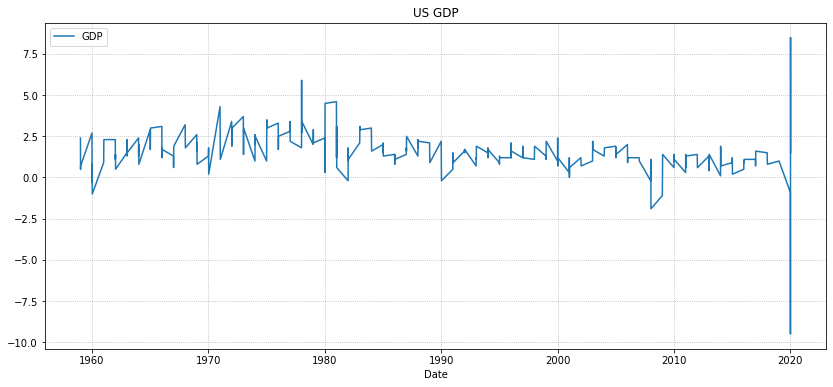

In [381]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(data.DATE, data.GDP, label='GDP')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('US GDP')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

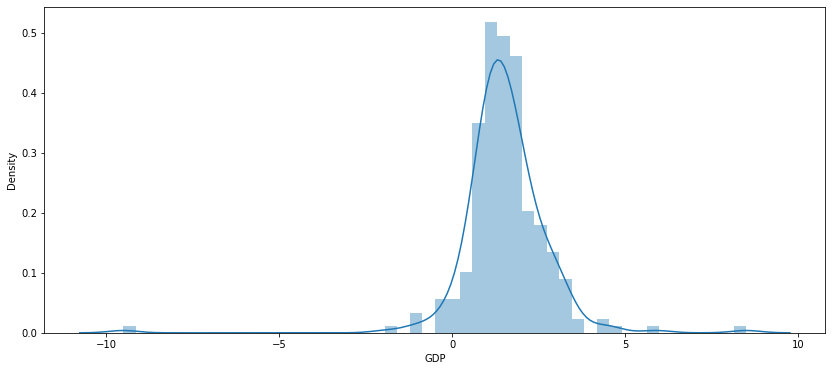

In [382]:
sns.distplot(data.GDP)

In [383]:
from scipy import stats
import scipy as scipy 

In [384]:
# Shapiro Wilk Test
stats.shapiro(data.GDP)

# Running this command we can observe 2 values (test statistics and p-value)

# H0 is that the data is normal
# HI data is not normal 

ShapiroResult(statistic=0.7771012783050537, pvalue=4.852035091673228e-18)

In [385]:
# According to the graph we can see that nominal GDP has grown gradually since 1959 up to 2020
# We can also see that the data is skewed to the right, which means that most data falls to the right/positive side of the graph

## Money Supply - M2

In [386]:
data.M2

0       1.2
1       1.8
2       0.4
3       0.6
4       0.6
       ... 
242     1.9
243     1.7
244    10.5
245     7.6
246     2.3
Name: M2, Length: 247, dtype: float64

In [387]:
data.M2.describe()

count    247.000000
mean       1.713765
std        1.090262
min       -0.200000
25%        1.100000
50%        1.600000
75%        2.150000
max       10.500000
Name: M2, dtype: float64

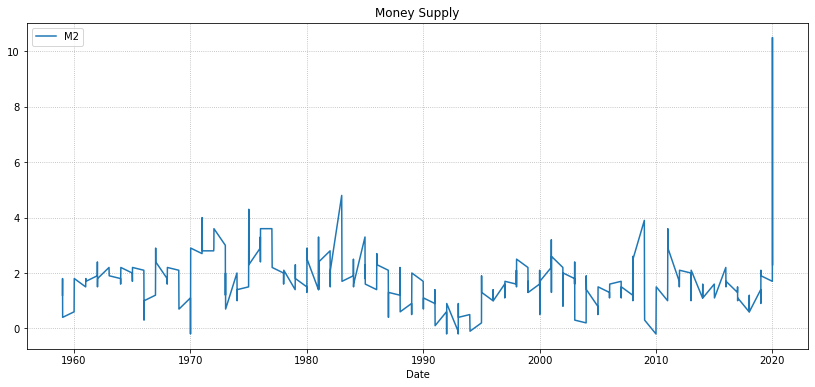

In [388]:
rcParams['figure.figsize'] = 14,6
plt.plot(data.DATE, data.M2, label='M2')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('Money Supply')
plt.grid(True, linestyle=':')
plt.show()

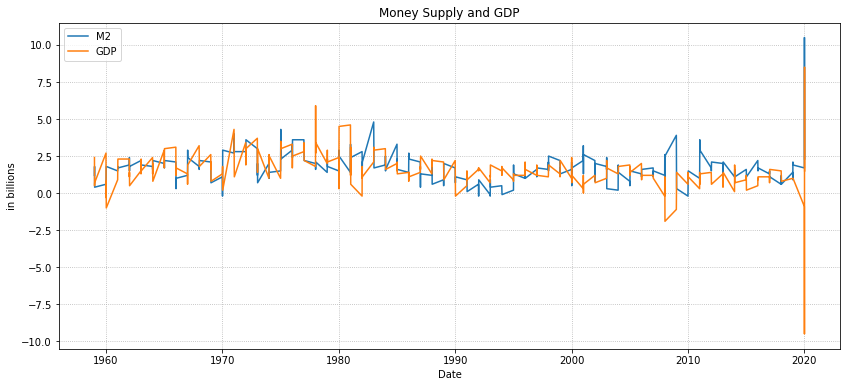

In [389]:
rcParams['figure.figsize'] = 14,6
plt.plot(data.DATE, data.M2, label='M2')
plt.plot(data.DATE, data.GDP, label='GDP')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('in billions')
plt.title('Money Supply and GDP')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='M2', ylabel='Density'>

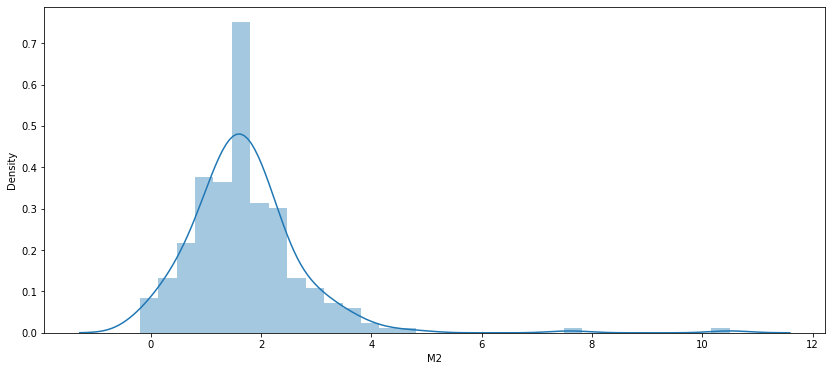

In [390]:
sns.distplot(data.M2)

In [391]:
stats.shapiro(data.M2)

ShapiroResult(statistic=0.8144868016242981, pvalue=1.8119658662748048e-16)

In [392]:
# Money supply M2 behaves similar to GDP as expected and is also skewed to the right. 

## Consumer Price Index

In [393]:
data.CPI

0     -0.1
1      0.6
2      0.7
3      0.1
4      0.6
      ... 
242    0.6
243    0.5
244   -1.0
245    0.9
246    0.7
Name: CPI, Length: 247, dtype: float64

In [394]:
data.CPI.describe()

count    247.000000
mean       0.896356
std        0.809363
min       -2.300000
25%        0.500000
50%        0.800000
75%        1.200000
max        3.700000
Name: CPI, dtype: float64

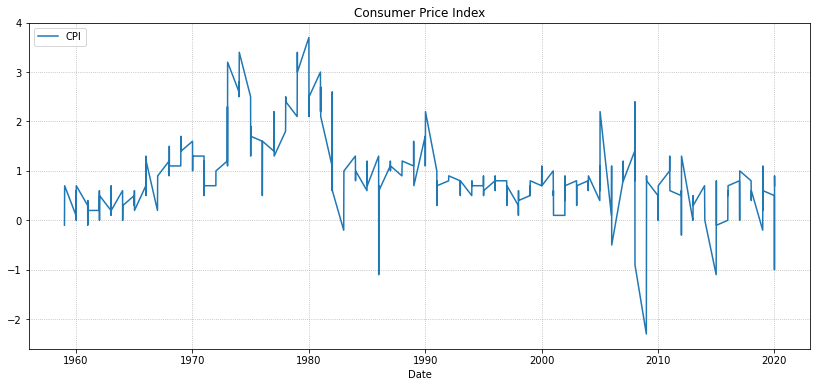

In [395]:
rcParams['figure.figsize'] = 14,6
plt.plot(data.DATE, data.CPI, label='CPI')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('Consumer Price Index')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

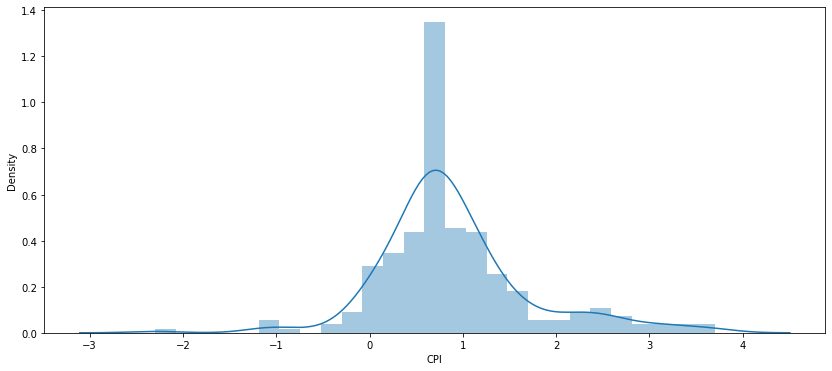

In [396]:
sns.distplot(data.CPI)

In [397]:
stats.shapiro(data.CPI)

ShapiroResult(statistic=0.9104782938957214, pvalue=5.366624852842783e-11)

In [398]:
# CPI is also not normally distributed 

## Interest Rate

In [399]:
data.Interest_rate

0      3.0
1      3.5
2      4.0
3      4.0
4      4.0
      ... 
242    2.3
243    2.3
244    0.3
245    0.3
246    0.3
Name: Interest_rate, Length: 247, dtype: float64

In [400]:
data.Interest_rate.describe()

count    247.000000
mean       4.663158
std        2.870889
min        0.300000
25%        3.000000
50%        4.500000
75%        6.000000
max       14.000000
Name: Interest_rate, dtype: float64

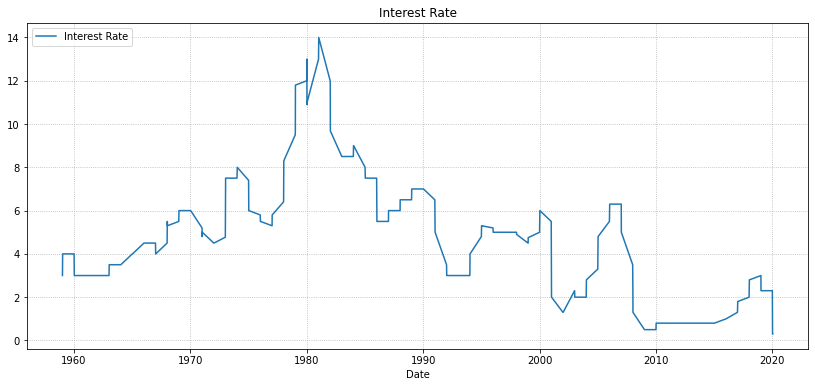

In [401]:
rcParams['figure.figsize'] = 14,6
plt.plot(data.DATE, data.Interest_rate, label='Interest Rate')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('Interest Rate')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_rate', ylabel='Density'>

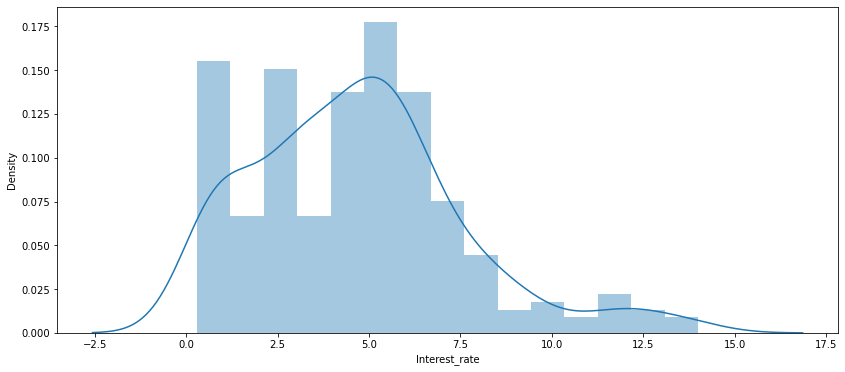

In [402]:
sns.distplot(data.Interest_rate)

In [403]:
stats.shapiro(data.Interest_rate)

ShapiroResult(statistic=0.9445352554321289, pvalue=4.568971334606431e-08)

In [404]:
# Interest rate is also not normally distributed 

## Unemployment Rate

In [405]:
data.Unemp_rate

0       5.2
1       5.1
2       5.7
3       5.2
4       5.2
       ... 
242     3.7
243     3.6
244     3.6
245     3.5
246    14.8
Name: Unemp_rate, Length: 247, dtype: float64

In [406]:
data.Unemp_rate.describe()

count    247.000000
mean       5.987854
std        1.687645
min        3.400000
25%        4.850000
50%        5.700000
75%        7.000000
max       14.800000
Name: Unemp_rate, dtype: float64

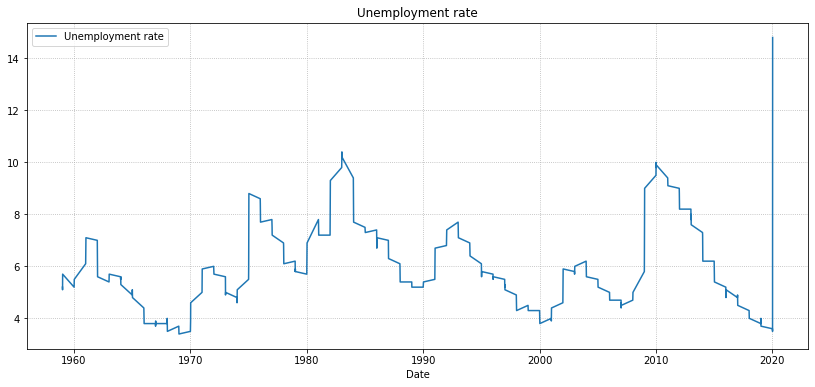

In [407]:
rcParams['figure.figsize'] = 14,6
plt.plot(data.DATE, data.Unemp_rate, label='Unemployment rate')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('Unemployment rate')
plt.grid(True, linestyle=':')
plt.show()

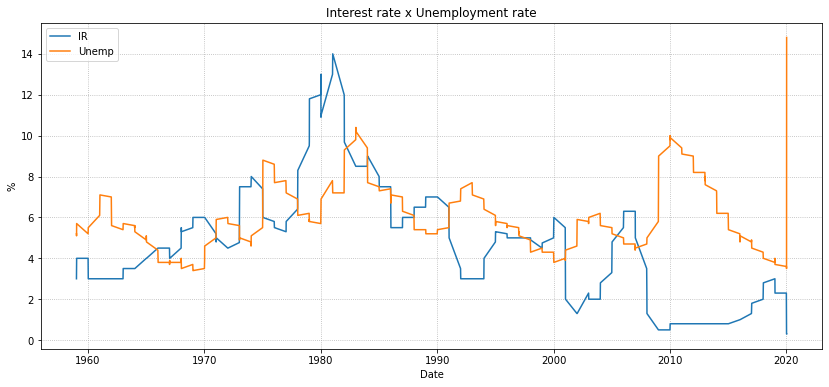

In [408]:
rcParams['figure.figsize'] = 14,6
plt.plot(data.DATE, data.Interest_rate, label='IR')
plt.plot(data.DATE, data.Unemp_rate, label='Unemp')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('Interest rate x Unemployment rate')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemp_rate', ylabel='Density'>

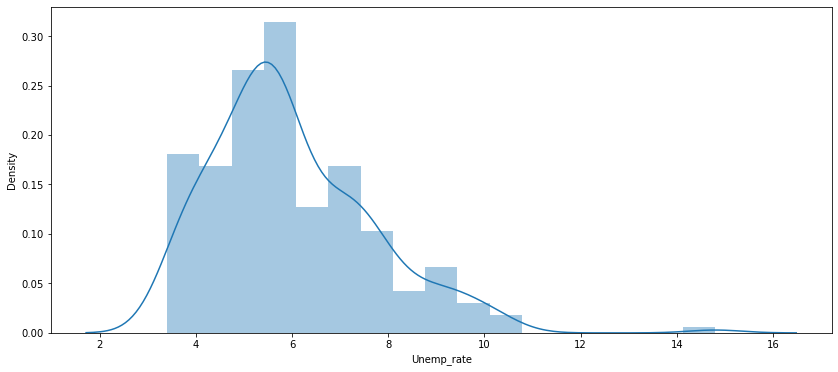

In [409]:
sns.distplot(data.Unemp_rate)

In [410]:
stats.shapiro(data.Unemp_rate)

ShapiroResult(statistic=0.9336339235305786, pvalue=4.19783319216549e-09)

In [411]:
# Unemployment rate is not normally distrubuted and the relation between interest rate and unemployment rate. A correlation 
# table will help us understand this better.

## Correlation Matrix

In [412]:
corrMatrix = data.corr()
print (corrMatrix)

                    GDP        M2       CPI  Interest_rate  Unemp_rate
GDP            1.000000 -0.034361  0.369376       0.297190    0.119921
M2            -0.034361  1.000000 -0.093505       0.053973    0.036964
CPI            0.369376 -0.093505  1.000000       0.633322    0.026067
Interest_rate  0.297190  0.053973  0.633322       1.000000    0.039744
Unemp_rate     0.119921  0.036964  0.026067       0.039744    1.000000


In [413]:
# We need to be careful here because the data could be influenced by trend and seasonality effects

### Stationaity test

#### The idea is to see whether or not the data tomorrow is simlar to the data today. We need a constant mean otherwise the data is 
#### not stationary

In [414]:
# By looking at the graphs for GDP, M2 and CPI we can see that our data is unlickely to be stationary but let's test 

In [415]:
from statsmodels.tsa.stattools import adfuller

In [416]:
# GDP Augmented Dickey-Fuller test
X = data['GDP'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -1.872535
p-value: 0.345090
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Failed to reject H0 - Time Series is non-stationary


In [417]:
# M2 Augmented Dickey-Fuller test
X = data['M2'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -3.734978
p-value: 0.003647
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is stationary


In [418]:
# CPI Augmented Dickey-Fuller test
X = data['CPI'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -3.432608
p-value: 0.009896
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is stationary


In [419]:
# Ineterest rate Augmented Dickey-Fuller test
X = data['Interest_rate'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -2.266291
p-value: 0.183070
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Failed to reject H0 - Time Series is non-stationary


In [420]:
# Unemployment rate Augmented Dickey-Fuller test
X = data['Unemp_rate'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -2.771455
p-value: 0.062468
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to reject H0 - Time Series is non-stationary


In [421]:
# Since the data is non stationary let's apply differencing technique 

In [422]:
data['diff_GDP'] = data['GDP'] - data['GDP'].shift(1)

<AxesSubplot:>

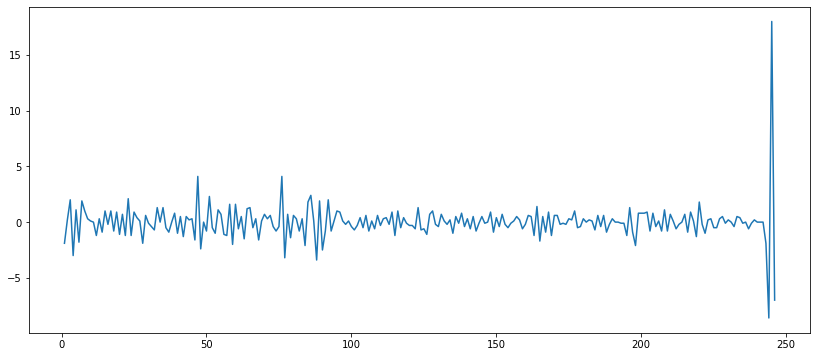

In [423]:
data['diff_GDP'].dropna().plot()

In [424]:
data['diff_Interest_rate'] = data['Interest_rate'] - data['Interest_rate'].shift(1)

<AxesSubplot:>

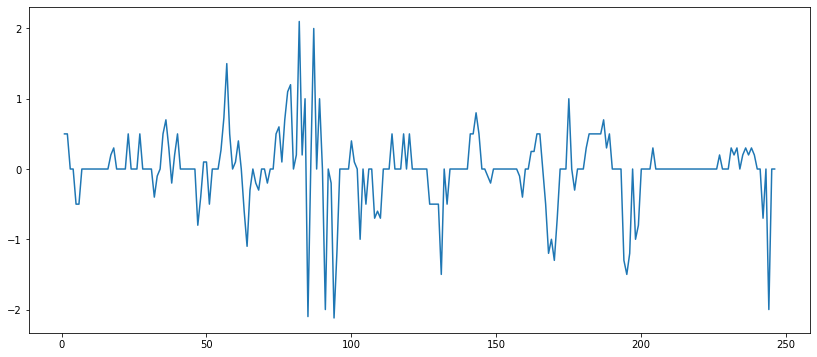

In [425]:
data['diff_Interest_rate'].dropna().plot()

In [426]:
data['diff_Unemp'] = data['Unemp_rate'] - data['Unemp_rate'].shift(1)

<AxesSubplot:>

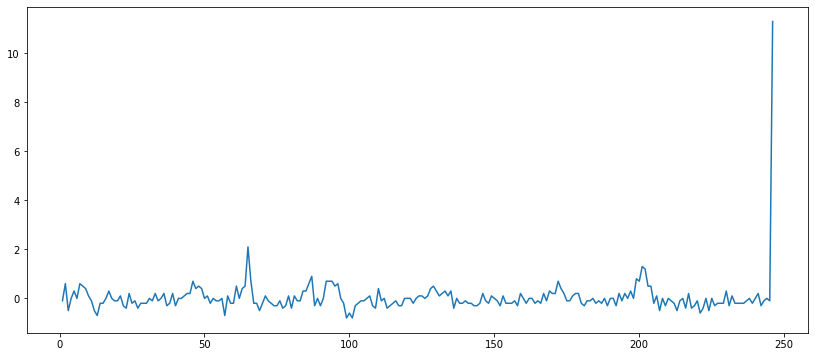

In [427]:
data['diff_Unemp'].dropna().plot()

In [428]:
# Let's drop these columns since they are useless for our analysis 
data.drop(['GDP', 'Interest_rate', 'Unemp_rate'], 1, inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_19224\2270718144.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['GDP', 'Interest_rate', 'Unemp_rate'], 1, inplace=True)


In [429]:
data_1 = pd.DataFrame(data)

data_1 = data.iloc[1:]

print(data_1)

          DATE    M2  CPI  diff_GDP  diff_Interest_rate  diff_Unemp
1   1959-01-07   1.8  0.6      -1.9                 0.5        -0.1
2   1959-01-10   0.4  0.7       0.2                 0.5         0.6
3   1960-01-01   0.6  0.1       2.0                 0.0        -0.5
4   1960-01-04   0.6  0.6      -3.0                 0.0         0.0
5   1960-01-07   1.3  0.0       1.1                -0.5         0.3
..         ...   ...  ...       ...                 ...         ...
242 2019-01-10   1.9  0.6       0.0                -0.7        -0.3
243 2020-01-01   1.7  0.5      -1.9                 0.0        -0.1
244 2020-01-04  10.5 -1.0      -8.6                -2.0         0.0
245 2020-01-07   7.6  0.9      18.0                 0.0        -0.1
246 2020-01-10   2.3  0.7      -7.0                 0.0        11.3

[246 rows x 6 columns]


In [430]:
data_1.rename(columns = {'diff_GDP':'GDP', 'diff_Interest_rate':'Int_rate','diff_Unemp':'Unemp'}, inplace = True)

C:\Users\andre\AppData\Local\Temp\ipykernel_19224\505172319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.rename(columns = {'diff_GDP':'GDP', 'diff_Interest_rate':'Int_rate','diff_Unemp':'Unemp'}, inplace = True)


In [431]:
data_1

,DATE,M2,CPI,GDP,Int_rate,Unemp
1,1959-01-07,1.8,0.6,-1.9,0.5,-0.1
2,1959-01-10,0.4,0.7,0.2,0.5,0.6
3,1960-01-01,0.6,0.1,2.0,0.0,-0.5
4,1960-01-04,0.6,0.6,-3.0,0.0,0.0
5,1960-01-07,1.3,0.0,1.1,-0.5,0.3
...,...,...,...,...,...,...
242,2019-01-10,1.9,0.6,0.0,-0.7,-0.3
243,2020-01-01,1.7,0.5,-1.9,0.0,-0.1
244,2020-01-04,10.5,-1.0,-8.6,-2.0,0.0
245,2020-01-07,7.6,0.9,18.0,0.0,-0.1


In [432]:
# Diff_GDP Augmented Dickey-Fuller test
X = data_1['GDP'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -8.860369
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is stationary


In [433]:
# Ineterest rate Augmented Dickey-Fuller test
X = data_1['Int_rate'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -6.266053
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is stationary


In [434]:
# Unemployment rate Augmented Dickey-Fuller test
X = data_1['Unemp'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -3.836885
p-value: 0.002552
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is stationary


## Long Short Term Memory implementation
### As dataset is stationary and ready it is time to implement the ML model

In [435]:
# Library
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [436]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 1 to 246
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      246 non-null    datetime64[ns]
 1   M2        246 non-null    float64       
 2   CPI       246 non-null    float64       
 3   GDP       246 non-null    float64       
 4   Int_rate  246 non-null    float64       
 5   Unemp     246 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.7 KB


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>], dtype=object)

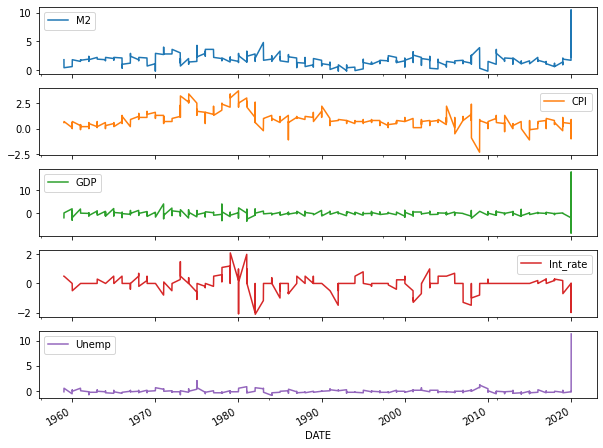

In [437]:
#plot all variables
data_1.set_index('DATE')[['M2','CPI','GDP','Int_rate','Unemp']].plot(subplots=True)

In [438]:
data_1 # let's use around 80% as training data, therefore, 246 x 0.8 = 197 approx. 

,DATE,M2,CPI,GDP,Int_rate,Unemp
1,1959-01-07,1.8,0.6,-1.9,0.5,-0.1
2,1959-01-10,0.4,0.7,0.2,0.5,0.6
3,1960-01-01,0.6,0.1,2.0,0.0,-0.5
4,1960-01-04,0.6,0.6,-3.0,0.0,0.0
5,1960-01-07,1.3,0.0,1.1,-0.5,0.3
...,...,...,...,...,...,...
242,2019-01-10,1.9,0.6,0.0,-0.7,-0.3
243,2020-01-01,1.7,0.5,-1.9,0.0,-0.1
244,2020-01-04,10.5,-1.0,-8.6,-2.0,0.0
245,2020-01-07,7.6,0.9,18.0,0.0,-0.1


In [439]:
# Move GDP column to be the first
titles = list(data_1.columns)
titles

['DATE', 'M2', 'CPI', 'GDP', 'Int_rate', 'Unemp']

In [440]:
titles[1], titles[2], titles[3] = titles[3], titles[1], titles[2]
titles

['DATE', 'GDP', 'M2', 'CPI', 'Int_rate', 'Unemp']

In [441]:
data_1 = data_1[titles]
data_1

,DATE,GDP,M2,CPI,Int_rate,Unemp
1,1959-01-07,-1.9,1.8,0.6,0.5,-0.1
2,1959-01-10,0.2,0.4,0.7,0.5,0.6
3,1960-01-01,2.0,0.6,0.1,0.0,-0.5
4,1960-01-04,-3.0,0.6,0.6,0.0,0.0
5,1960-01-07,1.1,1.3,0.0,-0.5,0.3
...,...,...,...,...,...,...
242,2019-01-10,0.0,1.9,0.6,-0.7,-0.3
243,2020-01-01,-1.9,1.7,0.5,0.0,-0.1
244,2020-01-04,-8.6,10.5,-1.0,-2.0,0.0
245,2020-01-07,18.0,7.6,0.9,0.0,-0.1


In [442]:
data_1.loc[196, 'DATE'] # Our training data goes until 04-01-2008

Timestamp('2008-01-04 00:00:00')

In [443]:
data_training = data_1[data_1['DATE']<'2017-01-04'].copy()
data_training

,DATE,GDP,M2,CPI,Int_rate,Unemp
1,1959-01-07,-1.9,1.8,0.6,0.5,-0.1
2,1959-01-10,0.2,0.4,0.7,0.5,0.6
3,1960-01-01,2.0,0.6,0.1,0.0,-0.5
4,1960-01-04,-3.0,0.6,0.6,0.0,0.0
5,1960-01-07,1.1,1.3,0.0,-0.5,0.3
...,...,...,...,...,...,...
227,2016-01-01,0.3,2.2,0.0,0.2,-0.2
228,2016-01-04,0.5,1.8,0.6,0.0,-0.2
229,2016-01-07,-0.1,1.5,0.5,0.0,-0.2
230,2016-01-10,0.2,1.7,0.7,0.0,0.3


In [444]:
data_test = data_1[data_1['DATE']>='2017-01-04'].copy()
data_test

,DATE,GDP,M2,CPI,Int_rate,Unemp
232,2017-01-04,-0.4,1.5,0.3,0.2,0.1
233,2017-01-07,0.5,1.0,0.0,0.3,-0.2
234,2017-01-10,0.4,1.1,1.0,0.0,-0.2
235,2018-01-01,-0.1,0.6,0.8,0.2,-0.2
236,2018-01-04,0.0,0.9,0.6,0.3,-0.2
237,2018-01-07,-0.6,1.2,0.4,0.2,-0.1
238,2018-01-10,-0.1,0.6,0.6,0.3,0.0
239,2019-01-01,0.2,1.4,-0.2,0.2,-0.2
240,2019-01-04,0.0,0.9,1.1,0.0,0.0
241,2019-01-07,0.0,2.1,0.2,0.0,0.2


In [445]:
training_data = data_training.drop(['DATE'], axis=1)
training_data

,GDP,M2,CPI,Int_rate,Unemp
1,-1.9,1.8,0.6,0.5,-0.1
2,0.2,0.4,0.7,0.5,0.6
3,2.0,0.6,0.1,0.0,-0.5
4,-3.0,0.6,0.6,0.0,0.0
5,1.1,1.3,0.0,-0.5,0.3
...,...,...,...,...,...
227,0.3,2.2,0.0,0.2,-0.2
228,0.5,1.8,0.6,0.0,-0.2
229,-0.1,1.5,0.5,0.0,-0.2
230,0.2,1.7,0.7,0.0,0.3


In [446]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.2       , 0.4       , 0.48333333, 0.62085308, 0.24137931],
       [0.48      , 0.12      , 0.5       , 0.62085308, 0.48275862],
       [0.72      , 0.16      , 0.4       , 0.50236967, 0.10344828],
       ...,
       [0.44      , 0.34      , 0.46666667, 0.50236967, 0.20689655],
       [0.48      , 0.38      , 0.5       , 0.50236967, 0.37931034],
       [0.45333333, 0.3       , 0.51666667, 0.57345972, 0.17241379]])

In [447]:
X_train = []
y_train = []

In [448]:
training_data.shape[0]

231

In [449]:
for i in range(4, training_data.shape[0]):
    X_train.append(training_data[i-4:i])
    y_train.append(training_data[i,0])

In [450]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [451]:
X_train.shape, y_train.shape

((227, 4, 5), (227,))

In [452]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [453]:
# Building the LSTM MODEL

In [454]:
reg = Sequential()

reg.add(LSTM(units= 10, activation= 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
reg.add(Dropout(0.2))

reg.add(LSTM(units= 10, activation= 'relu', return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units= 20, activation= 'relu', return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units= 20, activation='relu'))
reg.add(Dropout(0.4))

reg.add(Dense(units = 1))

In [455]:
X_train.shape[1], 5

(4, 5)

In [456]:
reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 4, 10)             640       
                                                                 
 dropout_12 (Dropout)        (None, 4, 10)             0         
                                                                 
 lstm_13 (LSTM)              (None, 4, 10)             840       
                                                                 
 dropout_13 (Dropout)        (None, 4, 10)             0         
                                                                 
 lstm_14 (LSTM)              (None, 4, 20)             2480      
                                                                 
 dropout_14 (Dropout)        (None, 4, 20)             0         
                                                                 
 lstm_15 (LSTM)              (None, 20)               

In [457]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [458]:
reg.fit(X_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
12/12 [==============================] - 5s 6ms/step - loss: 0.2090
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1700
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1256
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0772
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0362
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0316
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0278
Epoch 8/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0320
Epoch 9/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0258
Epoch 10/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0298


### Test data

In [459]:
data_test.head()

,DATE,GDP,M2,CPI,Int_rate,Unemp
232,2017-01-04,-0.4,1.5,0.3,0.2,0.1
233,2017-01-07,0.5,1.0,0.0,0.3,-0.2
234,2017-01-10,0.4,1.1,1.0,0.0,-0.2
235,2018-01-01,-0.1,0.6,0.8,0.2,-0.2
236,2018-01-04,0.0,0.9,0.6,0.3,-0.2


In [460]:
data_training.tail(4) # since we want the next 10 quarters then I also need the last 10 quarters 

,DATE,GDP,M2,CPI,Int_rate,Unemp
228,2016-01-04,0.5,1.8,0.6,0.0,-0.2
229,2016-01-07,-0.1,1.5,0.5,0.0,-0.2
230,2016-01-10,0.2,1.7,0.7,0.0,0.3
231,2017-01-01,0.0,1.3,0.8,0.3,-0.3


In [461]:
past_10_Q = data_training.tail(4)

In [462]:
df = past_10_Q.append(data_test, ignore_index=True)
df = df.drop(['DATE'], axis = 1)
df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_19224\4011984473.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_10_Q.append(data_test, ignore_index=True)


,GDP,M2,CPI,Int_rate,Unemp
0,0.5,1.8,0.6,0.0,-0.2
1,-0.1,1.5,0.5,0.0,-0.2
2,0.2,1.7,0.7,0.0,0.3
3,0.0,1.3,0.8,0.3,-0.3
4,-0.4,1.5,0.3,0.2,0.1


In [463]:
inputs = scaler.transform(df)
inputs

array([[ 0.52      ,  0.4       ,  0.48333333,  0.50236967,  0.20689655],
       [ 0.44      ,  0.34      ,  0.46666667,  0.50236967,  0.20689655],
       [ 0.48      ,  0.38      ,  0.5       ,  0.50236967,  0.37931034],
       [ 0.45333333,  0.3       ,  0.51666667,  0.57345972,  0.17241379],
       [ 0.4       ,  0.34      ,  0.43333333,  0.54976303,  0.31034483],
       [ 0.52      ,  0.24      ,  0.38333333,  0.57345972,  0.20689655],
       [ 0.50666667,  0.26      ,  0.55      ,  0.50236967,  0.20689655],
       [ 0.44      ,  0.16      ,  0.51666667,  0.54976303,  0.20689655],
       [ 0.45333333,  0.22      ,  0.48333333,  0.57345972,  0.20689655],
       [ 0.37333333,  0.28      ,  0.45      ,  0.54976303,  0.24137931],
       [ 0.44      ,  0.16      ,  0.48333333,  0.57345972,  0.27586207],
       [ 0.48      ,  0.32      ,  0.35      ,  0.54976303,  0.20689655],
       [ 0.45333333,  0.22      ,  0.56666667,  0.50236967,  0.27586207],
       [ 0.45333333,  0.46      ,  0.4

In [464]:
X_test = []
y_test = []

for i in range(4, inputs.shape[0]):
    X_test.append(inputs[i-4:i])
    y_test.append(inputs[i, 0])

In [465]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((15, 4, 5), (15,))

In [466]:
y_pred = reg.predict(X_test)

1/1 [==============================] - 0s 454ms/step


In [467]:
y_pred , y_test

(array([[0.41812867],
        [0.41627955],
        [0.41662002],
        [0.4153509 ],
        [0.4155505 ],
        [0.4159138 ],
        [0.4141975 ],
        [0.41249558],
        [0.41323727],
        [0.4130333 ],
        [0.4143067 ],
        [0.41650724],
        [0.41542763],
        [0.41606873],
        [0.41782832]], dtype=float32),
 array([ 0.4       ,  0.52      ,  0.50666667,  0.44      ,  0.45333333,
         0.37333333,  0.44      ,  0.48      ,  0.45333333,  0.45333333,
         0.45333333,  0.2       , -0.69333333,  2.85333333, -0.48      ]))

In [468]:
# put y_pred = y_pred = np.array(y_pred)

In [469]:
# we now need to converted the predicted values to its normal form
scaler.scale_

array([0.13333333, 0.2       , 0.16666667, 0.23696682, 0.34482759])

In [470]:
scale = 1/0.13333333       
scale

7.500000187500005

In [471]:
y_pred = y_pred*scale
y_test = y_test*scale

In [472]:
y_pred = np.asarray(y_pred)

In [473]:
y_pred.ndim

2

In [474]:
y_pred.size # Adjust the size

15

In [475]:
y_pred.shape

(15, 1)

In [476]:
y_pred.dtype

dtype('float32')

In [477]:
y_test.size

15

In [638]:
#y_pred_1 = y_pred.flatten()

In [639]:
#y_pred_1.ndim

1

## Visualisation

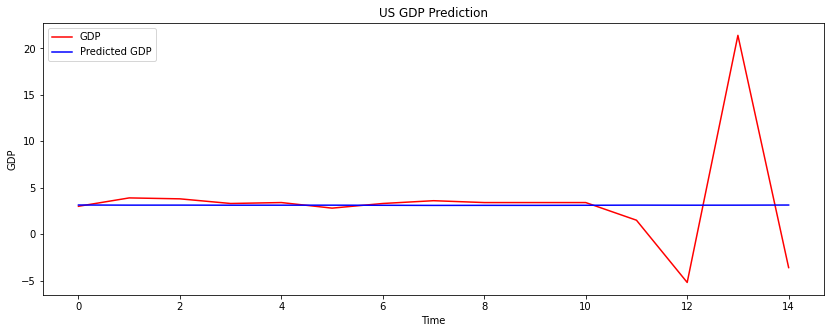

In [478]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'GDP')
plt.plot(y_pred, color = 'blue', label = 'Predicted GDP')
plt.title('US GDP Prediction')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()